<a href="https://csdms.colorado.edu"><img style="float: center; width: 75%" src="https://raw.githubusercontent.com/csdms/project/main/assets/CSDMS-logo-color-tagline-hor.png"></a>

# <span style="color: green;">Python for Modeling II: How to solve diffusion in python</span>

## Background: Soil Creep
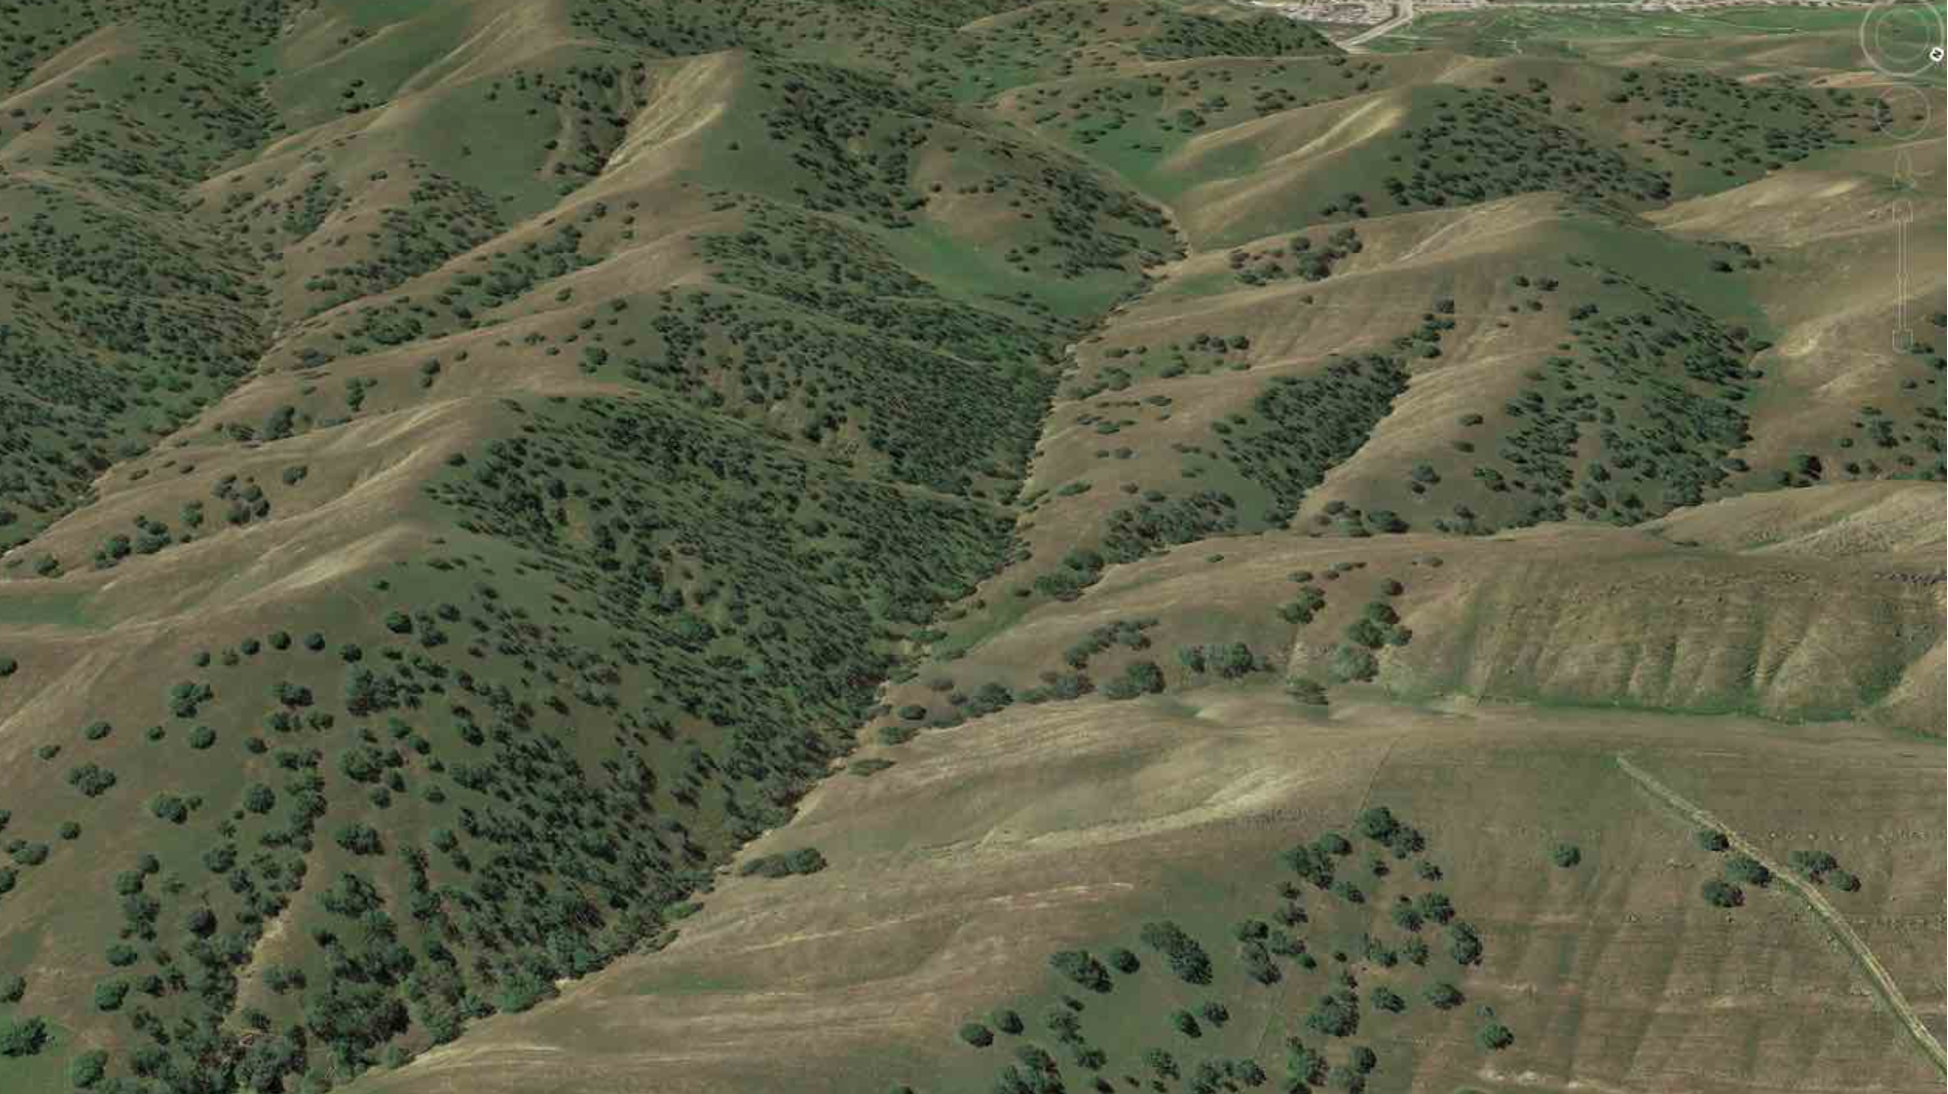

*Soil creep* is the gradual downhill motion of soil by any of a variety of processes, including animal burrowing (animals are more likely to toss soil downhill from their burrows), freeze-thaw cycling (freezing tends to push soil outward, with net motion downhill), the occasional falling of trees with soil attached to their roots (trees are more likely to fall downhill, and take soil with them), among others.

On soil-mantled slopes that aren't too steep, the rate of soil flow downhill, $q$, depends on how steep the hill is. We can write this mathematically as a **flux law** for soil:

$$q = -K_c \frac{\partial z}{\partial x}$$

where $z$ is the height of the land, and $x$ is distance from the hill top. The symbol $q$ represents the volume of soil flow per year per meter in the cross-slope direction. The factor $K_c$ ($c$ for "creep") has units of square meters per year, and has been estimated in the field at anywhere from $10^{-4}$ to $>10^{-2}$, depending on the climate, vegetation, and soil type. The minus sign indicates that soil flows downhill, not uphill.

Where soil creep is the only major process shaping the land, we can also write a mass conservation equation that tells us how fast the land height, $z$, is rising or falling at a given point:

$$\frac{\partial z}{\partial t} = -\frac{\partial q}{\partial x}$$

When you combine these together, here's what you get:

$$\frac{\partial z}{\partial t} = K_c \frac{\partial^2 z}{\partial x^2}$$

This has exactly the form of a 1D diffusion equation!
We will revisit this and built more code from skratch for it in a later lecture.



### Simulating hillslope evolution by soil creep
Suppose we want to model the formation of a ridge between two streams. Each stream is cutting down at a given rate. Our domain consists of a cross-sectional profile from one stream to the other.

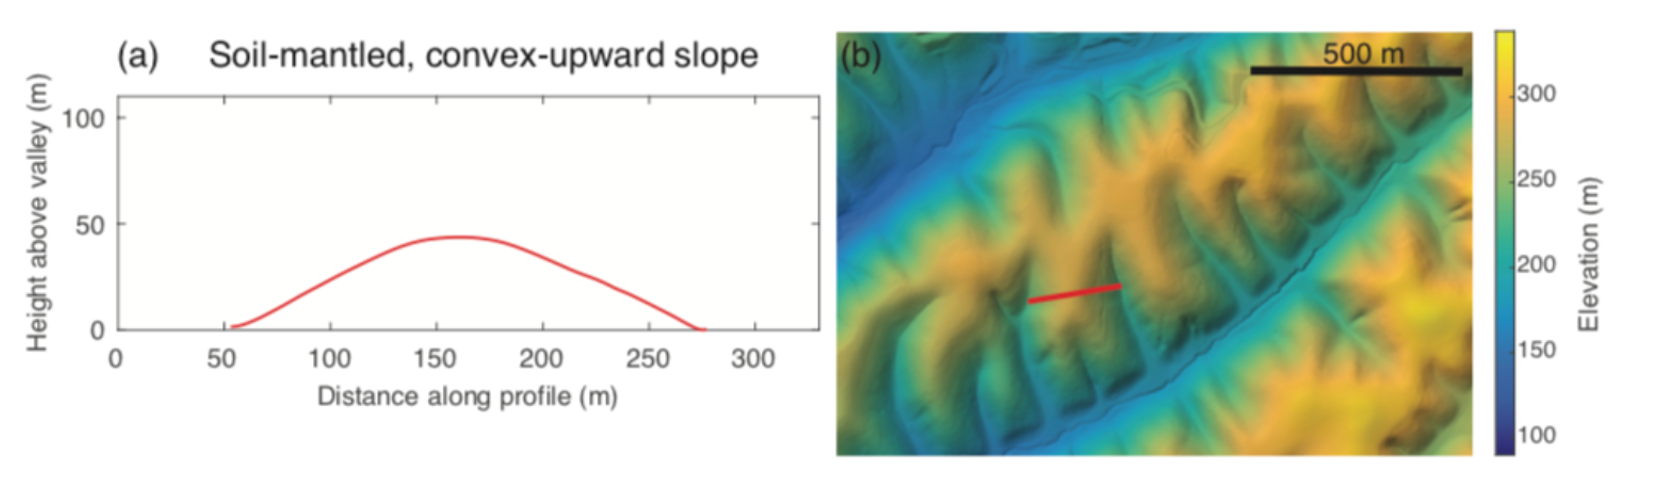


## Step 1: Discretization

To calculate $q$ using a finite-difference approximation, we'll divide hillslope up into discrete pieces, or *cells*. In the middle of each cell is a point, called a *node*, where we'll keep track of $z$.The idea is to update all the values of $z$ at each time step. Here's a sketch that illustrates the basic idea:

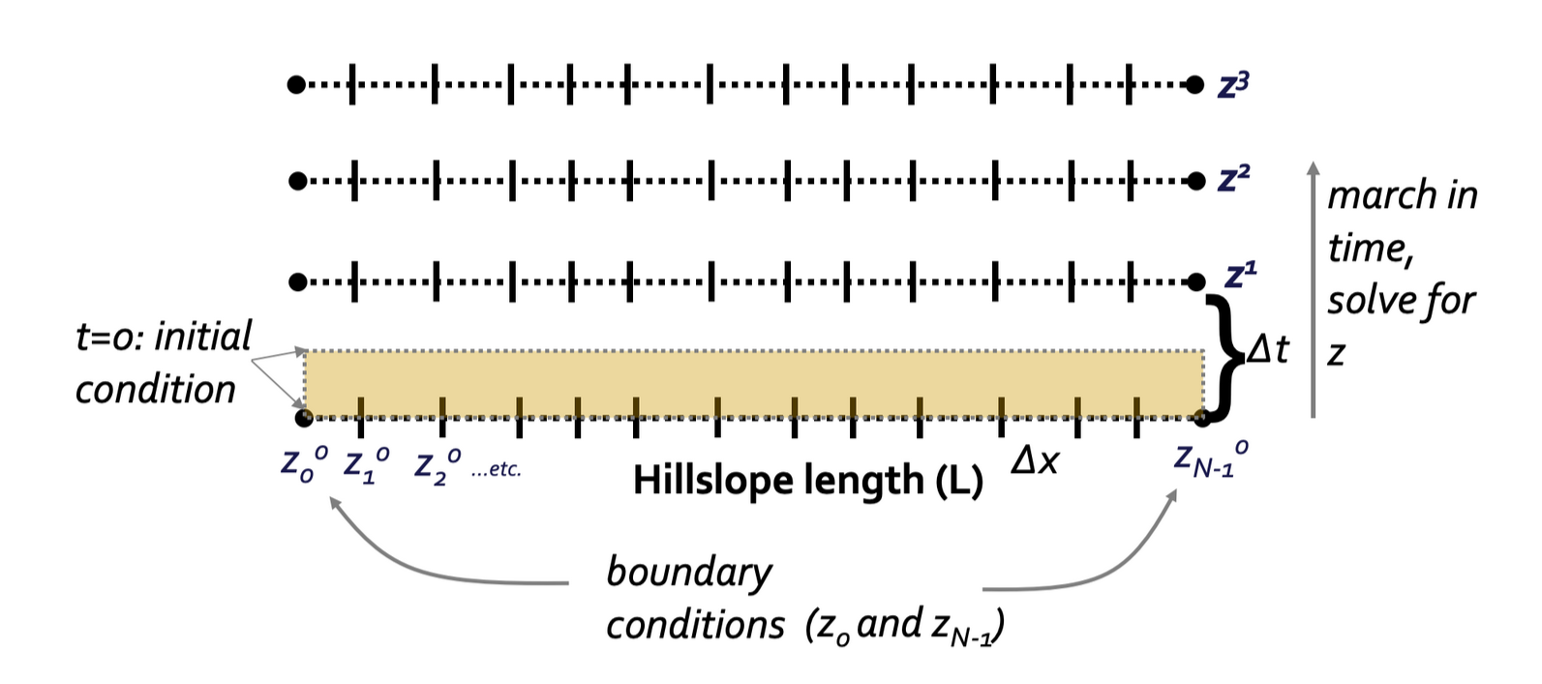 

Let's say we have 5 nodes:

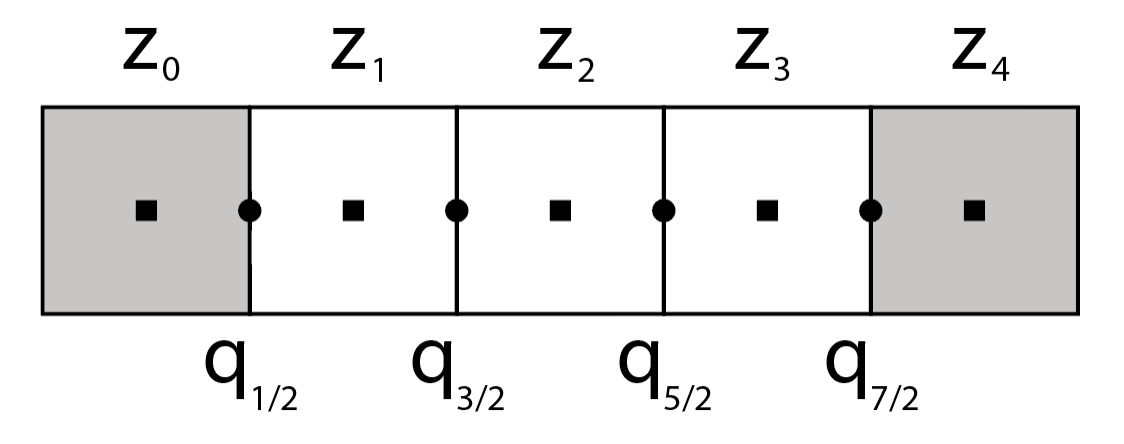

Nodes 0 and 4 are special: they are **boundary nodes**. They represent the heights of the two streams on either side of the ridge. We will make these gradually lower their elevations over time, simulating erosion. We will solve for the hillslope height at nodes 1, 2, and 3.


### Exercise 1: Setting up our domain and constants
Remember yesterday's lessons on array operations and syntax!

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
Kc =  # diffusion coefficient, m2/y
dx =  # distance between nodes, meters

# Create and initialize arrays
x = # horizontal domain
z = # vertical domain

# If you didn't above, can you change the elevation to 1m at nodes 1, 2, and 3 using array operations?
#z = 

# print the intial elevation array
z

In [ ]:
# Make a plot of our initial hillslope profile
plt.plot(x,z)
plt.title("initial hillslope")
plt.xlabel("distance")
plt.ylabel("height")
plt.show()

#### <span style="color: green;">a version of the correct script is below</span>

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
Kc =  1.0e-2 # diffusion coefficient, m2/y
dx =  10 # distance between nodes, meters

# Create and initialize arrays
x = np.arange(0, dx*5, dx) # horizontal domain
#z = np.array([0,1,1,1,0])

# Can you change the elevation to 1m at nodes 1, 2, and 3 using array operations?
z = np.zeros(5) # elevation array
z[1:4] = 1.0 

# print the intial elevation array
z

In [ ]:
# Make a plot of our initial hillslope profile
plt.plot(x,z)
plt.title("initial hillslope")
plt.xlabel("distance")
plt.ylabel("height")
plt.show()

## Step 2: Finite-difference equations


_**Soil Flux**_: Between nodes 1 and 2, we approximate the soil flux equation above as:

$$q = -K_c \frac{z_{2}^t-\ z_{1}^t}{\Delta x}$$

- $K_c$ = diffusion coefficient ($m^2/yr$)
- $\Delta x =$ distance between nodes ($m$)

In general, 
$$\boxed{q = -K_c \frac{z_{i+1}^t-\ z_{i}^t}{\Delta x}}$$

- **Notation**: $z_i^t$ means $z$ at node $i$ and time-step $t$.
<br/>

_**Mass Conservation**_: for node 1, we approximate the mass conservation equation above as:

$$\frac{z_1^{t+1} - z_1^t}{\Delta t} = -\frac{q_{3/2}^t - q_{1/2}^t}{\Delta x}$$

- $\Delta t =$ time-step size ($sec$), as before

- $\Delta x =$ distance between nodes ($m$)

- $q_{3/2}^t =$ ...huh?? Three halves? Yes. It's one and a half, and it means the position *halfway between node $1$ and node $2$*. That corresponds to the cell face between those nodes: a natural place to calculate the flux between them. This approach is called a *staggered-grid scheme*.

In general,

$$\frac{z_i^{t+1} - z_i^t}{\Delta t} = -\frac{q_{i+1/2}^t - q_{i-1/2}^t}{\Delta x}$$

Multiply both sides by $\Delta t$, then subtract $z_i^t$ from both sides, and we get an equation that tells us how to calculate the new elevation value at any node:

$$\boxed{z_i^{t+1} = z_i^t-\Delta t\left(\frac{q_{i+1/2}^t - q_{i-1/2}^t}{\Delta x}\right)}$$



#### Testing out what we have so far

Let's write some code to set up our pipe and calculate the fluxes between nodes. 

Represent height, `z`, at the 5 nodes using a numpy array, with a grid spacing, `dx`, of $10 \, m$.

We'll set the initial height to be 0 at the streams, and 1 m everywhere else.

We'll set the diffusion coefficient to $1.0e-2\;m^2/yr$

### Exercise 2a: Calculate the *soil flux* between each node individually. 
We previously found a formula to calculate the soil flux between any two adjacent nodes within a single timestep:

$$\boxed{q = -K_c \frac{z_{i+1}^t-\ z_{i}^t}{\Delta x}}$$


NOTE: a negative flux means the soil is flowing to the left; a positive flux means it's flowing to the right.

In [ ]:
# Calculate and print the flux from node 0 to node 1
q01 = 
print("Soil flux from node 0 to node 1:", q01, " m2/y")

# Try calculating and printing flux for nodes 1 to 2
q12 = 
print("Soil flux from node 1 to node 2:", q12, " m2/y")

# ...and nodes 2 to 3
q23 = 
print("Soil flux from node 2 to node 3:", q23, " m2/y")

# ...and nodes 3 to 4
q34 = 
print("Soil flux from node 3 to node 4:", q34, " m2/y")

#### *Questions to ponder*:

1. Which pairs of nodes have soil flow between them, and which do not? Why?

2. Do the directions of soil flow, indicated by the sign of q, make sense?

#### <span style="color: green;">a version of the correct script is below</span>

In [ ]:
# Calculate and print the flux from node 0 to node 1
q01 = -Kc * (z[1] - z[0]) / dx
print("Soil flux from node 0 to node 1:", q01, " m2/y")

# Try calculating and printing flux for nodes 1 to 2
q12 = -Kc * (z[2] - z[1]) / dx
print("Soil flux from node 1 to node 2:", q12, " m2/y")

# ...and nodes 2 to 3
q23 = -Kc * (z[3] - z[2]) / dx
print("Soil flux from node 2 to node 3:", q23, " m2/y")

# ...and nodes 3 to 4
q34 = -Kc * (z[4] - z[3]) / dx
print("Soil flux from node 3 to node 4:", q34, " m2/y")

#### It would be convenient if we could calculate all the fluxes at once, and store all the values in an array.

To do this, we'll define an array called `q` that represents the fluxes *at the cell faces between each pair of nodes*. <br/>
*Quiz*: How many array elements do we need?

In [ ]:
# Try it out: make a numpy array to hold the flux values
q = 
print(q)

To calculate values for `q`, we want to take the *difference* in `z` at each adjacent pair of nodes. An easy way to do this is using the numpy `diff()` function.

In [ ]:
# lets see what np.diff() does
thing = np.array([8,2,3,5])
np.diff(thing)

In [ ]:
# Example of diff()
diff_z = np.diff(z)
print(diff_z)

**Try it yourself**: use `diff` to calculate values for flux at each node pair, by multiplying the difference by `-D` and dividing by the distance between nodes, `dx`:

In [ ]:
# equation using diff to calculate the flux at each link
q = 
print(q)

#### <span style="color: green;">a version of the correct script is below</span>

In [ ]:
# Try it out: make a numpy array to hold the flux values
q = [q01, q12, q23, q34]
print(q)

In [ ]:
# lets see what np.diff() does
thing = np.array([8,2,3,5])
np.diff(thing)

In [ ]:
# Example of diff()
diff_z = np.diff(z)
print(diff_z)

In [ ]:
q = -Kc*np.diff(z)/dx
print(q)

### Exercise 2b: Calculating the mass conservation.

Let's go back to mass conservation. Previously we found a formula for updating elevation at any node for a new time step:

$$\boxed{z_i^{t+1} = z_i^t-\Delta t\left(\frac{q_{i+1/2}^t - q_{i-1/2}^t}{\Delta x}\right)}$$

We know how to calculate $q$. How can we use numpy to calculate the piece in parentheses?

In [ ]:
# Recipe:
# - calculate the values of q at the cell edges
# - use np.diff() to calculate the difference in each pair of q
# - divide by node spacing (dx)
# - store the result in an array variable called dqdx
q =        # flux at the 4 cell edges
dqdx =     # "divergence" of flux at 3 inner nodes

# Report the results
print("Fluxes at cell edges:", q)
print("Difference in q divided by dx:", dqdx)

#### <span style="color: green;">a version of the correct script is below</span>

In [ ]:
# Recipe:
# - calculate the values of q at the cell edges
# - use np.diff() to calculate the difference in each pair of q
# - divide by node spacing (dx)
# - store the result in an array variable called dqdx
q = -Kc * np.diff(z) / dx # flux at the 4 cell edges
dqdx = np.diff(q) / dx # "divergence" of flux at 3 inner nodes

# Report the results
print("Fluxes at cell edges:", q)
print("Difference in q divided by dx:", dqdx)

### *Making sense of array sizes*

- $z$ has 5 elements, representing the 5 nodes.
- $q$ has 4 elements, representing the 4 cell faces between nodes
- $dqdx$ has 3 elements, representing the 3 interior nodes

```
.--|--o--|--o--|--o--|--.
0     1     2     3     4  <= z at 5 nodes
   0     1     2     3     <= q at 4 cell edges
      0     1     2        <= dqdx at 3 interior nodes
```

### *Updating $z$ for one time step*

We've now seen how to calculate the quantity in parenthese below:

$$z_i^{t+1} = z_i^t - \Delta t \left(\frac{q_{i+1/2}^t - q_{i-1/2}^t}{\Delta x}\right)$$

In our code, to update values of `z` for the new time step, we multiply `dqdx`by time-step size and subtract it from the current values of `z`. But we **only** do this for the interior values of `z`, which we can access like this:


In [ ]:
# Define a value for time-step size
dt = 1000 # time-step duration, years

# Calculate new values for height of the interior nodes (i.e., nodes 1, 2, and 3)
z[1:4] -= 
print("New values of z:", z)

# Try plotting this
plt.plot(x,z)
plt.title("hillslope after one timestep")
plt.xlabel("distance")
plt.ylabel("height")

#### <span style="color: green;">a version of the correct script is below</span>

In [ ]:
# Define a value for time-step size
dt = 1000.0 # time-step duration, years

# Calculate new values for height of the interior nodes (i.e., nodes 1, 2, and 3)
z[1:4] -= dt * dqdx
print("New values of z:", z)

# Try plotting this
plt.plot(x,z)
plt.title("hillslope after one timestep")
plt.xlabel("distance")
plt.ylabel("height")
plt.show()

## Step 3: Lowering the streams

To have the streams erode, we need to lower the elevations of nodes 0 and 4 by some amount each time step. 

### Exercise 3: Lower streams in a for loop.
- lowering rate = 0.001 m/y
- timestep duration = 1000 yr (set earlier)
- vertical lowering of streams in each timestep = rate * time
- number of timesteps = 5

In [ ]:
lowering_rate =    # stream lowering rate in m/yr
dt =               # timestep duration (can use variable set earlier)
drop_per_step =    # vertical lowering of streams in each timestep
num_time_steps =   # number of timesteps

# for loop to change elevation at boundary nodes
for i in range(num_time_steps):
    # line that drops node 0
    # line that drops node 4


#### <span style="color: green;">a version of the correct script is below</span>

In [ ]:
lowering_rate = 0.001                # stream lowering rate in m/yr
dt = 1000                            # timestep duration (can use variable set earlier)
drop_per_step = lowering_rate * dt   # vertical lowering of streams in each timestep
num_time_steps = 5                   # number of timesteps

# for loop to change elevation at boundary nodes
for i in range(num_time_steps):
    z[0] -= drop_per_step  # line that drops node 0
    z[-1] -= drop_per_step # line that drops node 4


## Step 4: Putting it all together in a single script

### *Pseudocode for the solution algorithm*

**Pseudocode** *is a shorthand way of writing an algorithm without using the precise syntax of a specific programming language. It's *really* helpful to write down pseudocode before you translate your algorithm into actual Python code (or any other programming language).*

We've seen each individual piece. Now we'll write out the complete solution algorithm, first using *pseudocode*:

```
# Initialize
Define parameters
Set up arrays

# Run
FOR each time step DO
    Lower the elevation at the two stream nodes
    Calculate flux values at cell faces
    Calculate divergence (dqdx) at interior nodes
    Update z values for the new time step

# Finalize
Plot and/or report final values
```

### Exercise 4: Write a program that translates the above pseudocode into actual code!

In [ ]:
# insert script here




#### <span style="color: green;">a version of the correct script is below</span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
Kc = 1.0e-2 # diffusion coefficient, m2/y
dx = 10.0 # distance between nodes, meters
dt = 1000.0 # time-step duration, years
lowering_rate = 0.001 
drop_per_step = lowering_rate * dt
num_time_steps = 5

# Create and initialize arrays
x = np.arange(0, dx * 5, dx)
z = np.zeros(5) # the elevation array
z[1:4] = 1.0 # initial height at nodes 1, 2, and 3

for i in range(num_time_steps):
    # lower elevation at the two stream nodes
    z[0] -= drop_per_step
    z[4] -= drop_per_step
    
    # Calculate flux values at cell faces
    q = -Kc*np.diff(z)/dx
    
    # Calculate divergence (dqdx) at interior nodes)
    dqdx = np.diff(q) / dx # "divergence" of flux at 3 inner nodes
    
    # Update z values for the new timestep
    z[1:4] -= dt * dqdx

    # Plot
    # Try plotting this
    plt.figure()
    plt.plot(x,z)
    plt.title("hillslope after one timestep")
    plt.xlabel("distance")
    plt.ylabel("height")

# Try plotting this
plt.figure()
plt.plot(x,z)
plt.title("Final Timestep : hillslope after one timestep")
plt.xlabel("distance")
plt.ylabel("height")
plt.show()